In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Import latency data
pure_crdt = pd.read_csv('reportData/pure-crdt.csv')
pure_crdt.columns = ['processId', 'opId', 'latency']

pure_atomic = pd.read_csv('reportData/pure-atomic.csv')
pure_atomic.columns = ['processId', 'opId', 'latency']

atomic03 = pd.read_csv('reportData/0.3-atomic.csv')
atomic03.columns = ['processId', 'opId', 'latency']

atomic07 = pd.read_csv('reportData/0.7-atomic.csv')
atomic07.columns = ['processId', 'opId', 'latency']

atomic03 = pd.read_csv('reportData/0.3-atomic.csv')
atomic03.columns = ['processId', 'opId', 'latency']

atomic07b10 = pd.read_csv('reportData/b10-0.7-atomic.csv')
atomic07b10.columns = ['processId', 'opId', 'latency']

atomic07b20 = pd.read_csv('reportData/b20-0.7-atomic.csv')
atomic07b20.columns = ['processId', 'opId', 'latency']

# Import totals data
pure_crdt_totals = pd.read_csv('reportData/pure-crdt.totals.csv')
pure_atomic_totals = pd.read_csv('reportData/pure-atomic.totals.csv')
atomic03_totals = pd.read_csv('reportData/0.3-atomic.totals.csv')
atomic07_totals = pd.read_csv('reportData/0.7-atomic.totals.csv')
atomic07b10_totals = pd.read_csv('reportData/b10-0.7-atomic.totals.csv')
atomic07b20_totals = pd.read_csv('reportData/b20-0.7-atomic.totals.csv')

[Text(0, 0, 'Pure CRDT'),
 Text(1, 0, 'Pure Atomic'),
 Text(2, 0, 'Atomic 0.3'),
 Text(3, 0, 'Atomic 0.7'),
 Text(4, 0, 'Atomic 0.7 b10'),
 Text(5, 0, 'Atomic 0.7 b20')]

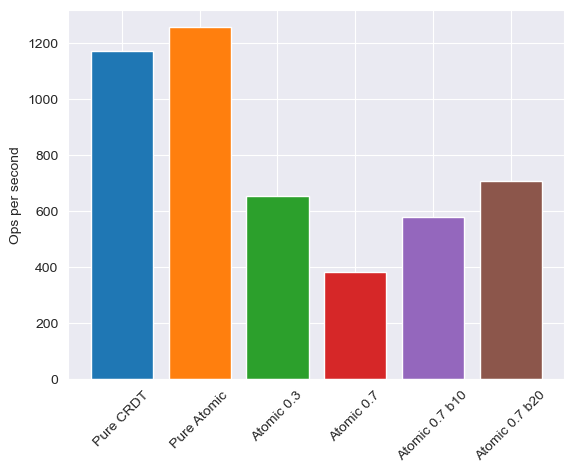

In [12]:
# Build opsPerSecond column for each test
pure_crdt_totals['opsPerSecond'] = pure_crdt_totals['Total responses'] / (pure_crdt_totals['Total time (ms)'] / 1000)
pure_atomic_totals['opsPerSecond'] = pure_atomic_totals['Total responses'] / (pure_atomic_totals['Total time (ms)'] / 1000)
atomic03_totals['opsPerSecond'] = atomic03_totals['Total responses'] / (atomic03_totals['Total time (ms)'] / 1000)
atomic07_totals['opsPerSecond'] = atomic07_totals['Total responses'] / (atomic07_totals['Total time (ms)'] / 1000)
atomic07b10_totals['opsPerSecond'] = atomic07b10_totals['Total responses'] / (atomic07b10_totals['Total time (ms)'] / 1000)
atomic07b20_totals['opsPerSecond'] = atomic07b20_totals['Total responses'] / (atomic07b20_totals['Total time (ms)'] / 1000)

# Compare as bar chart
fig, ax = plt.subplots()
ax.bar('Pure CRDT', pure_crdt_totals['opsPerSecond'], label='Pure CRDT')
ax.bar('Pure Atomic', pure_atomic_totals['opsPerSecond'], label='Pure Atomic')
ax.bar('Atomic 0.3', atomic03_totals['opsPerSecond'], label='Atomic 0.3')
ax.bar('Atomic 0.7', atomic07_totals['opsPerSecond'], label='Atomic 0.7')
ax.bar('Atomic 0.7 b10', atomic07b10_totals['opsPerSecond'], label='Atomic 0.7 b10')
ax.bar('Atomic 0.7 b20', atomic07b20_totals['opsPerSecond'], label='Atomic 0.7 b20')
ax.set_ylabel('Ops per second')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

KeyError: 'latency'

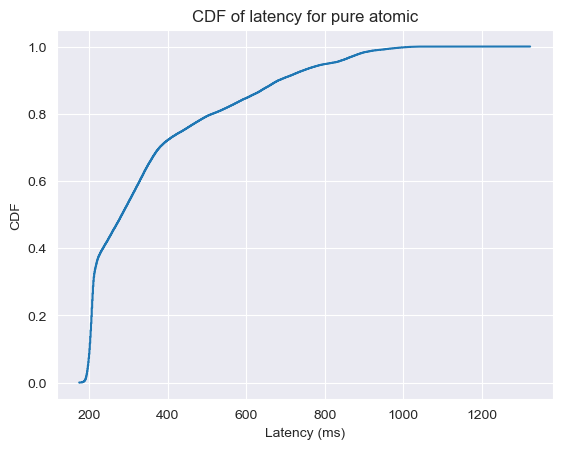

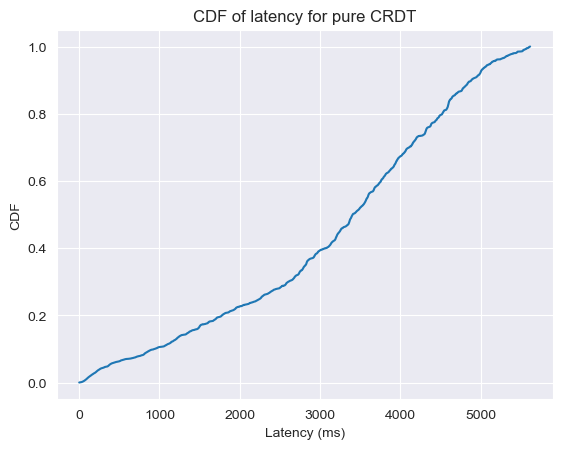

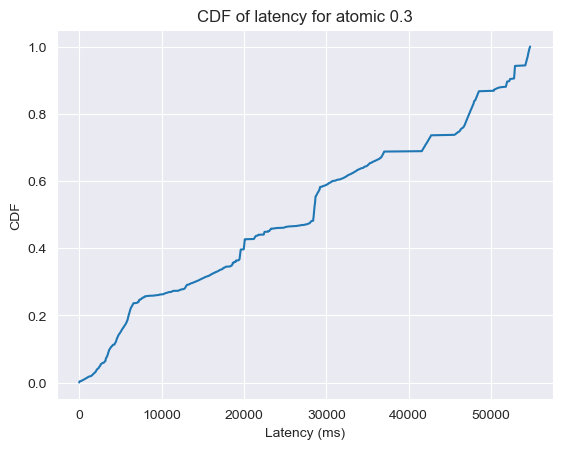

In [19]:
# Create a CDF plot of responseTime for pure atomic
# Sort the data
pure_atomic = pure_atomic.sort_values('latency')

# Create a new column with the cumulative sum of latencies
pure_atomic['cdf'] = pure_atomic['latency'].cumsum() / pure_atomic['latency'].sum()

# Plot the cdf
fig, ax = plt.subplots()
ax.plot(pure_atomic['latency'], pure_atomic['cdf'])
ax.set_xlabel('Latency (ms)')
ax.set_ylabel('CDF')
ax.set_title('CDF of latency for pure atomic')

# Compare with CDF of latency for pure CRDT
pure_crdt = pure_crdt.sort_values('latency')
pure_crdt['cdf'] = pure_crdt['latency'].cumsum() / pure_crdt['latency'].sum()

fig, ax = plt.subplots()
ax.plot(pure_crdt['latency'], pure_crdt['cdf'])
ax.set_xlabel('Latency (ms)')
ax.set_ylabel('CDF')
ax.set_title('CDF of latency for pure CRDT')

Text(0.5, 1.0, 'CDF of latency for atomic 0.7')

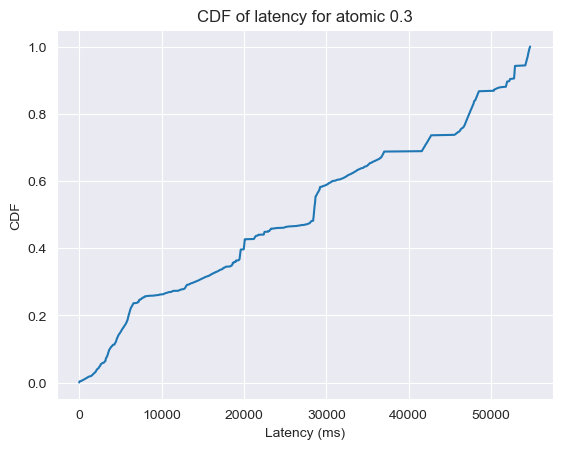

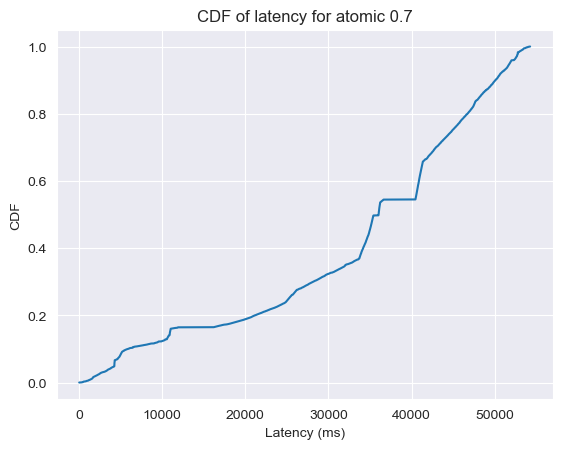

In [31]:
# Compare with CDF of latency for atomic 0.3
atomic03 = atomic03.sort_values('latency')
atomic03['cdf'] = atomic03['latency'].cumsum() / atomic03['latency'].sum()

fig, ax = plt.subplots()
ax.plot(atomic03['latency'], atomic03['cdf'])
ax.set_xlabel('Latency (ms)')
ax.set_ylabel('CDF')
ax.set_title('CDF of latency for atomic 0.3')

# Compare with CDF of latency for atomic 0.7
atomic07 = atomic07.sort_values('latency')
atomic07['cdf'] = atomic07['latency'].cumsum() / atomic07['latency'].sum()

fig, ax = plt.subplots()
ax.plot(atomic07['latency'], atomic07['cdf'])
ax.set_xlabel('Latency (ms)')
ax.set_ylabel('CDF')
ax.set_title('CDF of latency for atomic 0.7')

# Test Runs

Shared configuration:
```scala
// In Utils
val RANDOM_MESSAGE_DELAY = 50
val CRDT_SYNC_PERIOD = 500

// In test setup
val TEST_TIME = 60000 // 60 seconds
val REQUEST_WAIT_NS = 75000 // 0.75 ms
val REQUEST_WAIT_NS_VARIANCE = 25000 // 0.25 ms
val N_ACTORS = 4 // 4 CRDT actors, 4 writers, 4 readers

// In test
val PUT_PROB = 0.5
```

## 1. Pure CRDT load
Configuration:
```scala
val ATOMIC_PROB = 0
```

### Result
1. `pure-crdt.csv`
2. `pure-crdt.totals.csv`
```
State size at end: 23849
Atomic: 0
Puts: 36347
Gets: 36501
Total time: 60059 ms
Total requests: 77247
Total responses: 70199
Total reads: 69625
Total unmatched requests: 7048
Average ops per second: 1169
0 Atomic - Mean: 760, Variance: 1840009.6772176242, StdDev: 1356.4695636901051
0 Atomic - Median response time: 70.0 ms

```

## 2. Pure Atomic load
Configuration:
```scala
val ATOMIC_PROB = 1
val BATCH_SIZE = 1
```

### Result
1. `pure-atomic.csv`
2. `pure-atomic.totals.csv`

```
State size at end: 38012
Atomic: 73649
Puts: 38365
Gets: 38327
Total time: 60415 ms
Total requests: 77014
Total responses: 75826
Total reads: 75313
Total unmatched requests: 1188
Average ops per second: 1263
1 Atomic - Mean: 288, Variance: 20602.997903093925, StdDev: 143.53744425443114
1 Atomic - Median response time: 218.0 ms
```

## 3. Split load (no batching)
Configuration:
```scala
val BATCH_SIZE = 1
```

### 30/70 Atomic to CRDT
Configuration:
```scala
val ATOMIC_PROB = 0.3
```

#### Result
1. `0.3-atomic.csv`
2. `0.3-atomic.totals.csv`

```
State size at end: 7723
Atomic: 19067
Puts: 31905
Gets: 32506
Total time: 60020 ms
Total requests: 67437
Total responses: 39161
Total reads: 38605
Total unmatched requests: 28276
Average ops per second: 652
0.3 Atomic - Mean: 866, Variance: 2.269479630359286E7, StdDev: 4763.905572489117
0.3 Atomic - Median response time: 1.0 ms
```

### 70/30 Atomic to CRDT
Configuration:
```scala
val ATOMIC_PROB = 0.7
```

#### Result
1. `0.7-atomic.csv`
2. `0.7-atomic.totals.csv`
```
State size at end: 4207
Atomic: 50040
Puts: 37321
Gets: 37520
Total time: 60273 ms
Total requests: 75978
Total responses: 23062
Total reads: 22858
Total unmatched requests: 52916
Average ops per second: 384
0.7 Atomic - Mean: 3521, Variance: 1.051462582346284E8, StdDev: 10254.084953550384
0.7 Atomic - Median response time: 1.0 ms
```

## 4. Split load (10 batching)
```scala
val ATOMIC_PROB = 0.7
val BATCH_SIZE = 10
```

### Result
NOTE: Latency here is biased due to batching. The mean and median response times are higher than expected.
1. `b10-0.7-atomic.csv`
2. `b10-0.7-atomic.totals.csv`
```
State size at end: 17886
Atomic: 14459
Puts: 75967
Gets: 76591
Total time: 62569 ms
Total requests: 153052
Total responses: 36268
Total reads: 8263
Total unmatched requests: 116784
Average ops per second: 584
0.7 Atomic - Mean: 8330, Variance: 9.733750860389324E7, StdDev: 9865.97732634194
0.7 Atomic - Median response time: 3355.0 ms
```

## 5. Split load (20 batching)
```scala
val ATOMIC_PROB = 0.7
val BATCH_SIZE = 20
```

### Result
NOTE: Latency here is biased due to batching. The mean and median response times are higher than expected.

1. `b20-0.7-atomic.csv`
2. `b20-0.7-atomic.totals.csv`
```
State size at end: 22129
Atomic: 7007
Puts: 75718
Gets: 76108
Total time: 60200 ms
Total requests: 152448
Total responses: 42548
Total reads: 4497
Total unmatched requests: 109900
Average ops per second: 709
0.7 Atomic - Mean: 9084, Variance: 1.2921353163307324E8, StdDev: 11367.213010807585
0.7 Atomic - Median response time: 2973.0 ms
```